# **Importing Liberaries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Importing Dataset**

In [ ]:
# Importing Dataset

Data = pd.read_csv("/UPI apps transaction data in 2021.csv")

In [ ]:
# Total Number of rows and columns

print(Data.shape)

(654, 7)


In [ ]:
# Printing first 5 rows

Data.head()

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year
0,Airtel Payments Bank Apps,9.04,2248.49,15.12,5732.09,12,2021
1,Airtel Payments Bank Apps,8.41,1923.95,15.90,5554.63,11,2021
2,Airtel Payments Bank Apps,7.60,1491.34,14.31,4746.79,10,2021
3,Airtel Payments Bank Apps,6.91,1520.92,11.52,3759.12,9,2021
4,Airtel Payments Bank Apps,6.14,1396.65,9.31,2941.88,8,2021


In [ ]:
# Printing last 5 Rows

Data.tail()

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year
649,YuvaPay,1.33,60.44,1.33,60.44,6,2021
650,YuvaPay,2.32,73.16,2.32,73.16,5,2021
651,YuvaPay,1.59,51.22,1.59,51.22,4,2021
652,YuvaPay,0.56,18.56,0.56,18.56,3,2021
653,YuvaPay,0.02,0.63,0.02,0.63,2,2021


In [ ]:
# Column Names

Data.columns

Index(['UPI Banks', 'Volume (Mn) By Costumers', 'Value (Cr) by Costumers',
       'Volume (Mn)', 'Value (Cr)', 'Month', 'Year'],
      dtype='object')

In [ ]:
# Type of data in columns

Data.dtypes

UPI Banks                    object
Volume (Mn) By Costumers    float64
Value (Cr) by Costumers     float64
Volume (Mn)                 float64
Value (Cr)                  float64
Month                         int64
Year                          int64
dtype: object

In [ ]:
# Data information

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   UPI Banks                 654 non-null    object 
 1   Volume (Mn) By Costumers  654 non-null    float64
 2   Value (Cr) by Costumers   654 non-null    float64
 3   Volume (Mn)               654 non-null    float64
 4   Value (Cr)                654 non-null    float64
 5   Month                     654 non-null    int64  
 6   Year                      654 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 35.9+ KB


In [ ]:
# Total Number of Banks

print("Total Number of Banks   :- ", Data["UPI Banks"].nunique())
print("============================================")

# Total Volume of Transaction in Mn

print("Total Volume of Transaction in Mn   :- ", Data['Volume (Mn) By Costumers'].sum())
print("============================================")

# Total value of Transaction in Cr

print("Total value of Transaction in Cr   :- ", Data['Value (Cr) by Costumers'].sum())
print("============================================")

# Total Value (Cr)

print("Total Value (Cr)" , Data["Value (Cr)"].sum())
print("============================================")

# Total Volume (Mn)

print("Total Volume (Mn)",Data["Volume (Mn)"].sum())

Total Number of Banks   :-  69
Total Volume of Transaction in Mn   :-  37906.46
Total value of Transaction in Cr   :-  7156913.5
Total Value (Cr) 7281764.63
Total Volume (Mn) 39541.05


# **Data Cleaning**

In [ ]:
# Checking Null Values

Data.isnull().sum()

UPI Banks                   0
Volume (Mn) By Costumers    0
Value (Cr) by Costumers     0
Volume (Mn)                 0
Value (Cr)                  0
Month                       0
Year                        0
dtype: int64

# **Data Visualization**

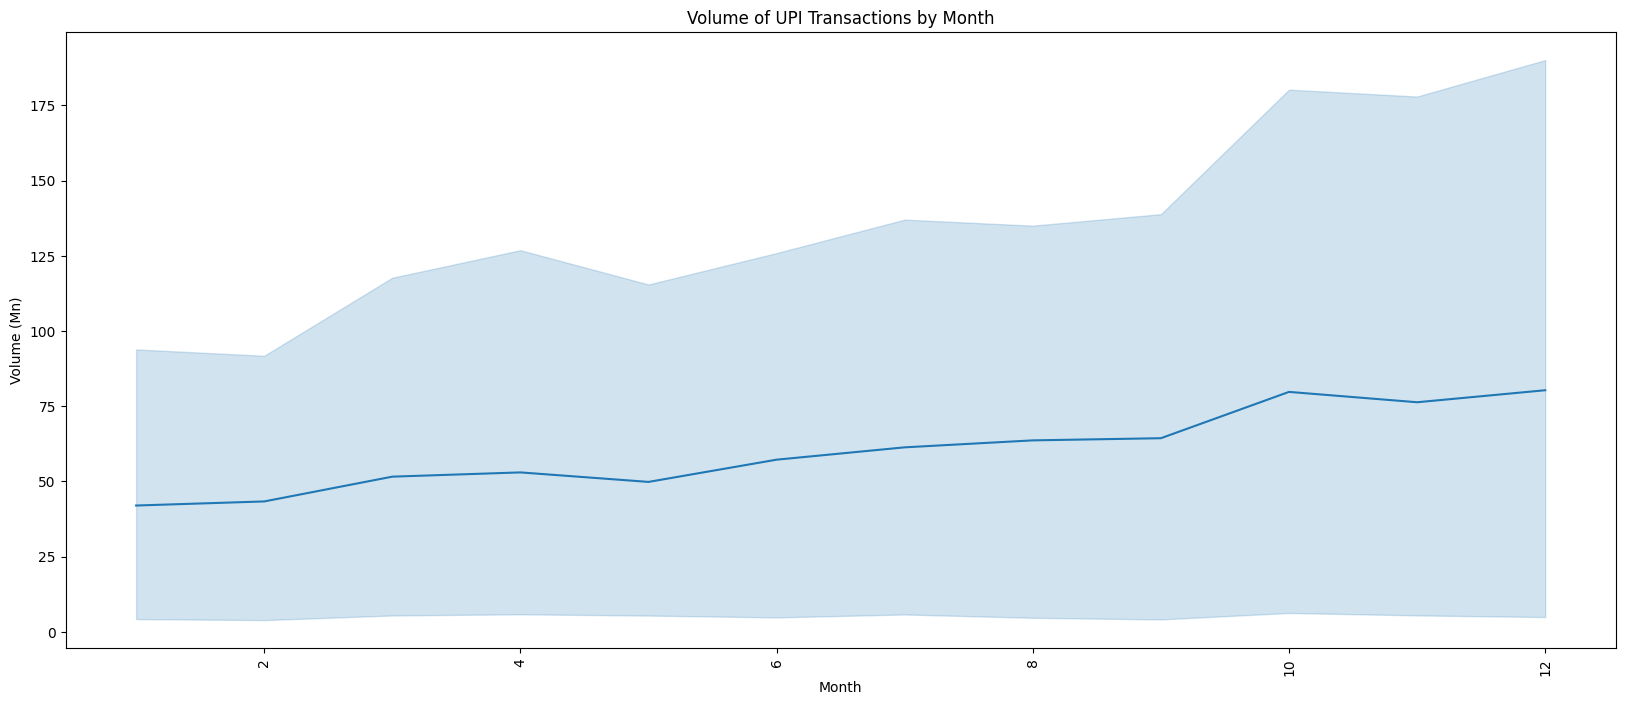

In [ ]:
# Line Graph of Volume and Month

plt.figure(figsize=(20,8))
sns.lineplot(x=Data["Month"],y=Data["Volume (Mn)"])
plt.xlabel("Month")
plt.ylabel("Volume (Mn)")
plt.title("Volume of UPI Transactions by Month")
plt.xticks(rotation=90)
plt.show()


In [ ]:

# Group by Bank and sum the Value (Cr) column
top_ten_banks = Data.groupby('UPI Banks')['Value (Cr)'].sum().reset_index()

# Sort the banks by Value (Cr) in descending order
top_ten_banks = top_ten_banks.sort_values('Value (Cr)', ascending=False)

# Select the top 10 banks
top_ten_banks = top_ten_banks.head(10)

# Print the top 10 banks with their Value (Cr)
print(top_ten_banks)


                    UPI Banks  Value (Cr)
51                    PhonePe  3365727.06
26                 Google Pay  2737496.81
50    Paytm Payments Bank App   669189.79
16                       Cred    97013.60
6                        BHIM    91106.89
29            ICICI Bank Apps    62297.95
67              Yes Bank Apps    61299.32
3                  Amazon Pay    60962.34
1   Airtel Payments Bank Apps    40586.97
60   State Bank of India Apps    25357.39


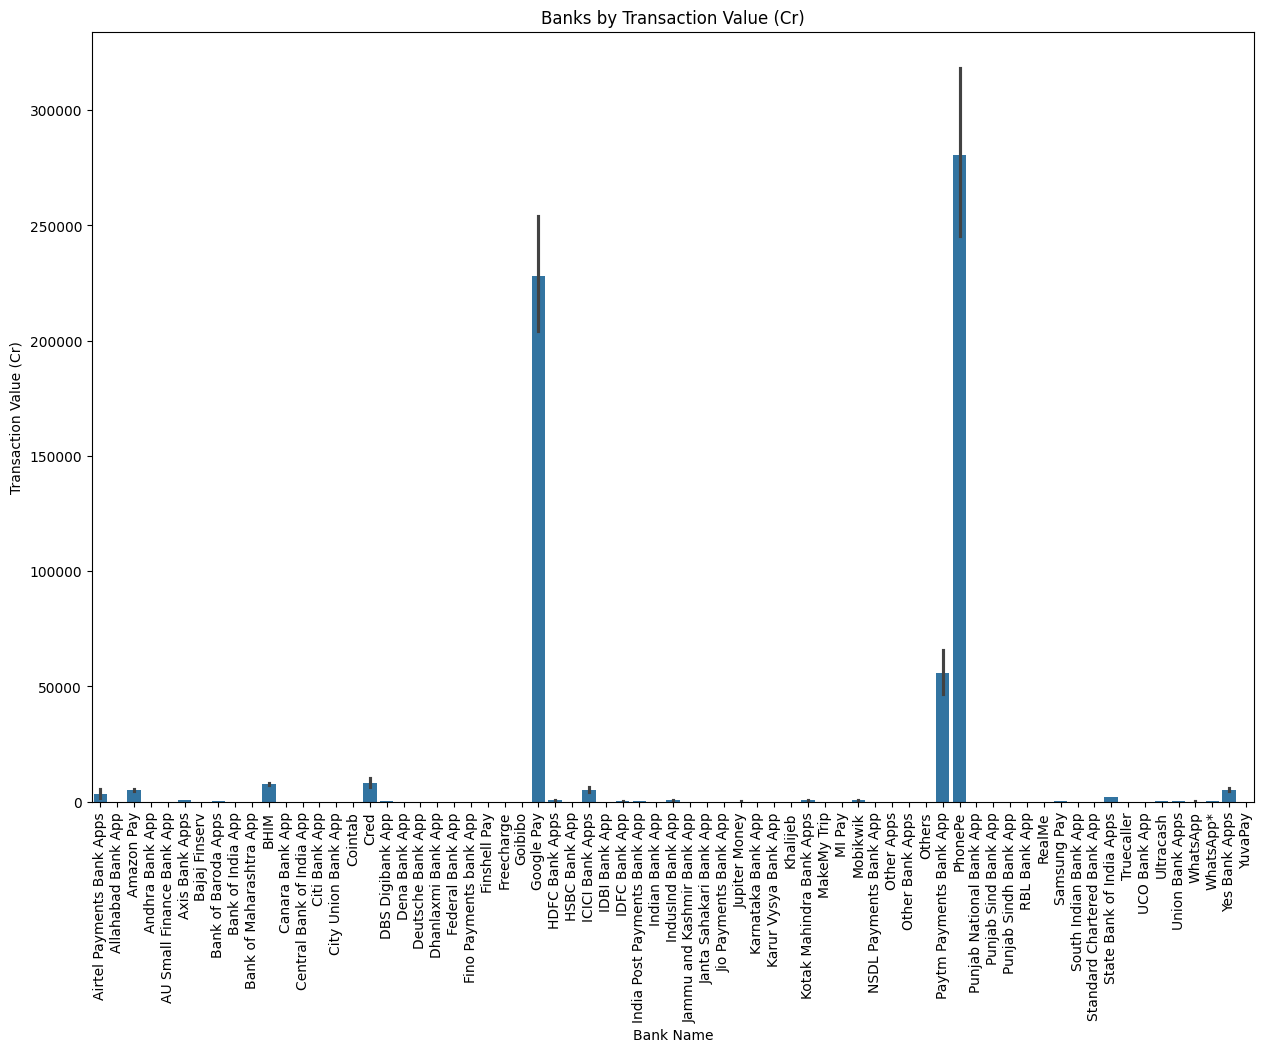

In [ ]:

plt.figure(figsize=(15, 10))
sns.barplot(x='UPI Banks', y='Value (Cr)', data=Data)
plt.xlabel('Bank Name')
plt.ylabel('Transaction Value (Cr)')
plt.title('Banks by Transaction Value (Cr)')
plt.xticks(rotation=90)
plt.show()


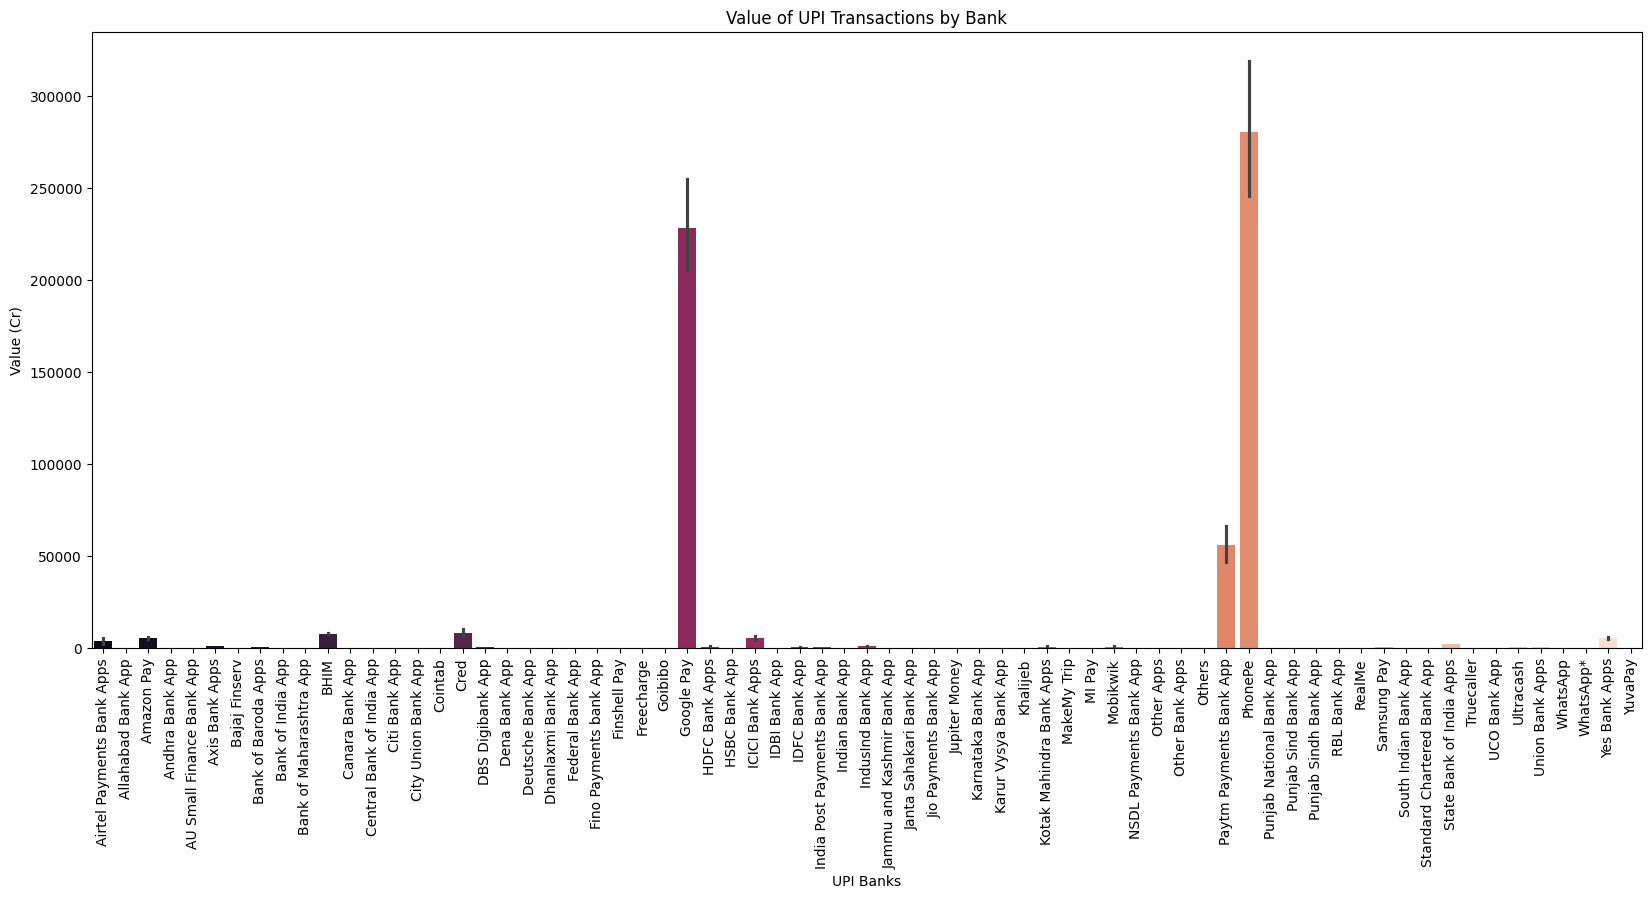

In [ ]:
# Bar Chart of Banks and Value in Descending Order

plt.figure(figsize=(20,8))
sns.barplot(x=Data["UPI Banks"],y=Data["Value (Cr)"],palette="rocket")
plt.xlabel("UPI Banks")
plt.ylabel("Value (Cr)")
plt.title("Value of UPI Transactions by Bank")
plt.xticks(rotation=90)
plt.show()


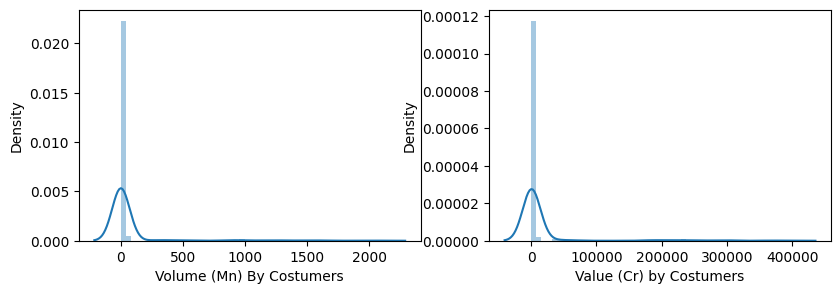

In [ ]:
plt.rcParams['figure.figsize'] = (15, 3)

plt.subplot(1, 3, 1)
sns.distplot(Data['Volume (Mn) By Costumers'])
plt.subplot(1,3,2)
sns.distplot(Data['Value (Cr) by Costumers'])

plt.show()

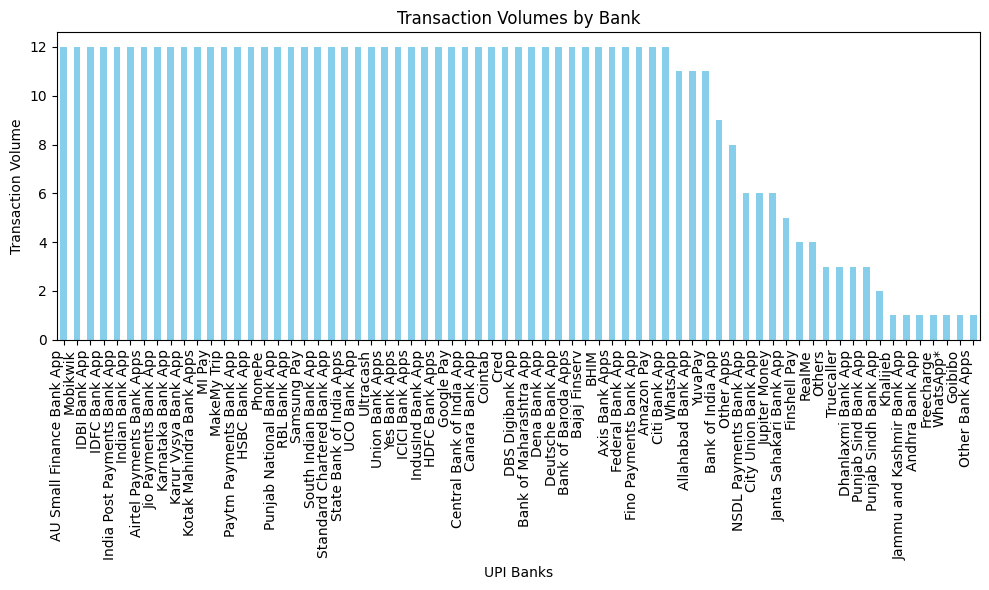

In [ ]:
bank_transaction_volumes = Data.groupby('UPI Banks')['Value (Cr)'].count().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
bank_transaction_volumes.plot(kind='bar', color='skyblue')
plt.title('Transaction Volumes by Bank')
plt.xlabel('UPI Banks')
plt.ylabel('Transaction Volume')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# histogram

import altair as alt
alt.Chart(Data).mark_bar().encode(
    x=alt.X('Volume (Mn)', bin=alt.Bin(maxbins=10)),
    y='count()'
)

alt.Chart(...)

In [ ]:
#pie chart

import altair as alt
chart = alt.Chart(Data).mark_arc().encode(
    theta=alt.Theta("Value (Cr):Q", stack=True),
    color=alt.Color("UPI Banks:N"),
    tooltip=["UPI Banks:N", "Value (Cr):Q"]
)
chart

alt.Chart(...)

In [ ]:
# Scatter Plot

import altair as alt

chart = alt.Chart(Data).mark_point().encode(
    x='Month',
    y='Volume (Mn) By Costumers',
    color='UPI Banks'
)
chart


alt.Chart(...)

array([[<Axes: xlabel='Volume (Mn) By Costumers', ylabel='Volume (Mn) By Costumers'>,
        <Axes: xlabel='Value (Cr) by Costumers', ylabel='Volume (Mn) By Costumers'>,
        <Axes: xlabel='Volume (Mn)', ylabel='Volume (Mn) By Costumers'>,
        <Axes: xlabel='Value (Cr)', ylabel='Volume (Mn) By Costumers'>,
        <Axes: xlabel='Month', ylabel='Volume (Mn) By Costumers'>,
        <Axes: xlabel='Year', ylabel='Volume (Mn) By Costumers'>],
       [<Axes: xlabel='Volume (Mn) By Costumers', ylabel='Value (Cr) by Costumers'>,
        <Axes: xlabel='Value (Cr) by Costumers', ylabel='Value (Cr) by Costumers'>,
        <Axes: xlabel='Volume (Mn)', ylabel='Value (Cr) by Costumers'>,
        <Axes: xlabel='Value (Cr)', ylabel='Value (Cr) by Costumers'>,
        <Axes: xlabel='Month', ylabel='Value (Cr) by Costumers'>,
        <Axes: xlabel='Year', ylabel='Value (Cr) by Costumers'>],
       [<Axes: xlabel='Volume (Mn) By Costumers', ylabel='Volume (Mn)'>,
        <Axes: xlabel='Value (Cr)

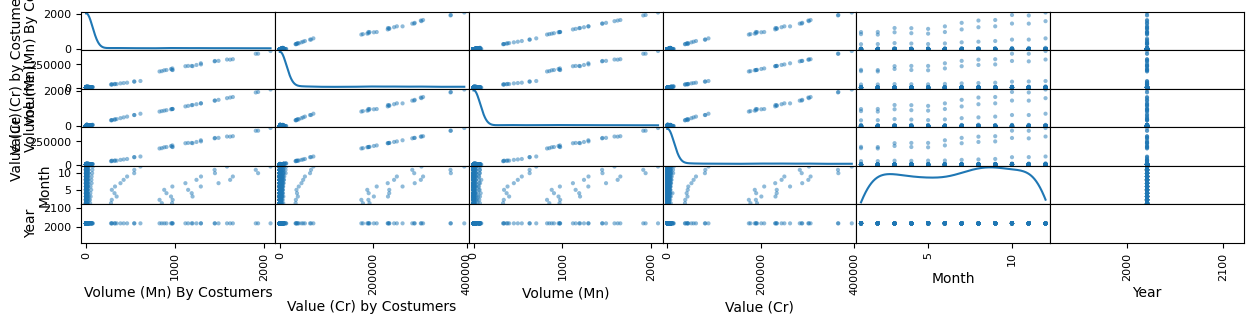

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(Data, diagonal="kde")

# **Regression Analysis**

In [ ]:
# prompt: ols regression model of Data

import statsmodels.formula.api as smf

# Fit an OLS regression model
model = smf.ols(formula='Volume (Mn) By Costumers ~ Value (Cr)', data=Data,)
results = model.fit()

# Print the model summary
print(results.summary())


SyntaxError: invalid syntax (<unknown>, line 1)